# Análisis General del Impacto de Desastres Hidrológicos: Tendencias (2010-2024)

**1. Importamos la base de datos**


In [15]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/database_2010_2024.xlsx")

df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2009-0595-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,GLIDE:CW-2010-000013,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,"[{""adm1_code"":1489,""adm1_name"":""Delhi""},{""adm1...",2010-08-04,2023-09-25
1,2010-0002-TJK,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,GLIDE:EQ-2010-000001,NaN,TJK,...,NaN,NaN,NaN,NaN,1500.0,2096.0,71.563596,"[{""adm2_code"":37581,""adm2_name"":""Vanchskiy""}]",2010-02-03,2023-09-25
2,2010-0003-SLB,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000h5np,NaN,SLB,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,"[{""adm2_code"":25652,""adm2_name"":""Administrativ...",2014-05-12,2023-09-25
3,2010-0004-BGD,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,NaN,2010-01-05,2023-09-25
4,2010-0005-IND,No,tec-tra-rai-rai,Technological,Transport,Rail,Rail,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,NaN,2010-01-05,2023-09-25


**2. Apartamos las columnas que necesitamos.**

In [16]:
# Mantener solo las variables mencionadas a continuacion.

columns_to_keep = ['Start Year', 'Start Month', 'Start Day',
    'Country', 'Region', 'Location', 'Magnitude',
    "Disaster Subgroup", 'Total Damage (\'000 US$)', 'Total Deaths' ]
df = df[columns_to_keep]

# Mostramos los primeros 5 elementos para identificar que se realizo el primer Filtro
df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
0,2010,1.0,2.0,India,Asia,"Srinagar city ('72808' district, '40424' Jammu...",-9.0,Meteorological,NaN,100.0
1,2010,1.0,2.0,Tajikistan,Asia,"Uskrogh, Rogh, Payshanbeobod, Gishkhun, Dashti...",5.4,Geophysical,1500.0,NaN
2,2010,1.0,3.0,Solomon Islands,Oceania,Administrative unit not available,7.1,Geophysical,NaN,NaN
3,2010,1.0,1.0,Bangladesh,Asia,Kanaipur road,NaN,Transport,NaN,17.0
4,2010,1.0,2.0,India,Asia,NaN,NaN,Transport,NaN,10.0


**3. Filtramos los Desastres Hidrológicos**

In [17]:
df = df[df["Disaster Subgroup"] == "Hydrological"]

df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
6,2010,1.0,NaN,Burundi,Africa,"Gatumba village (Mutimbuzi district, Bujumbura...",NaN,Hydrological,NaN,NaN
8,2010,1.0,4.0,Pakistan,Asia,Administrative unit not available district (Ja...,NaN,Hydrological,18000.0,19.0
15,2010,1.0,14.0,Philippines,Asia,"Jabonga, Las Nieves, Santiago areas (Agusan de...",NaN,Hydrological,22.0,2.0
16,2010,1.0,18.0,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...",226100.0,Hydrological,NaN,12.0
17,2010,1.0,19.0,Israel,Asia,Southern District province,NaN,Hydrological,NaN,2.0


**4. Con la siguiente funcion determinamos la limpieza que se realizo.**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2685 entries, 6 to 8400
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start Year               2685 non-null   int64  
 1   Start Month              2684 non-null   float64
 2   Start Day                2542 non-null   float64
 3   Country                  2685 non-null   object 
 4   Region                   2685 non-null   object 
 5   Location                 2662 non-null   object 
 6   Magnitude                506 non-null    float64
 7   Disaster Subgroup        2685 non-null   object 
 8   Total Damage ('000 US$)  706 non-null    float64
 9   Total Deaths             2053 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 230.7+ KB


**5. Para finalizar ajustamos el indice de manera organizada para tener coherencia en la data.**

In [19]:
indices = list(range(1,2686))
df.index = indices
df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
1,2010,1.0,NaN,Burundi,Africa,"Gatumba village (Mutimbuzi district, Bujumbura...",NaN,Hydrological,NaN,NaN
2,2010,1.0,4.0,Pakistan,Asia,Administrative unit not available district (Ja...,NaN,Hydrological,18000.0,19.0
3,2010,1.0,14.0,Philippines,Asia,"Jabonga, Las Nieves, Santiago areas (Agusan de...",NaN,Hydrological,22.0,2.0
4,2010,1.0,18.0,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...",226100.0,Hydrological,NaN,12.0
5,2010,1.0,19.0,Israel,Asia,Southern District province,NaN,Hydrological,NaN,2.0


**6.Guardamos el archivo de la data**

In [ ]:
df.to_excel("/content/drive/MyDrive/Colab Notebooks/1database_procesada_2010_2024.xlsx")

# Gráficas de tendencias

Importamos la data procesada para trabajar con los datos limpios.

In [20]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/1database_procesada_2010_2024.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2685 non-null   int64  
 1   Start Year               2685 non-null   int64  
 2   Start Month              2684 non-null   float64
 3   Start Day                2542 non-null   float64
 4   Country                  2685 non-null   object 
 5   Region                   2685 non-null   object 
 6   Location                 2662 non-null   object 
 7   Magnitude                506 non-null    float64
 8   Disaster Subgroup        2685 non-null   object 
 9   Total Damage ('000 US$)  706 non-null    float64
 10  Total Deaths             2053 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 230.9+ KB


Hacemos una segunda importación pero esta vez de la libreria qué utilizaremos para gráficar

In [21]:
import matplotlib.pyplot as plt

1. Gráfica de Desastres Hidrológicos por Región

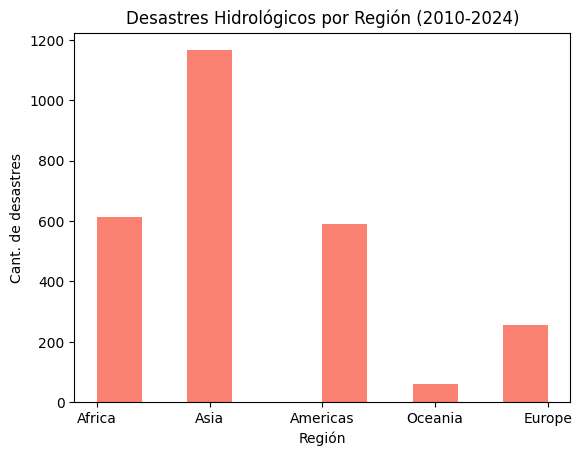

In [22]:
# Gráfica de desastres hidrologicos por región
region = df["Region"]
plt.hist(region, color="#FA8072")
plt.title("Desastres Hidrológicos por Región (2010-2024)")
plt.ylabel("Cant. de desastres")
plt.xlabel("Región")
plt.show()

Como se puede observar en los resultados de esta gráfica Asia es la región que más Desastres Hidrológicos obtuvo, con un total de casi 1200 cantidad de desastres.

2. Gráfica de Desastres Hidrológicos por Año

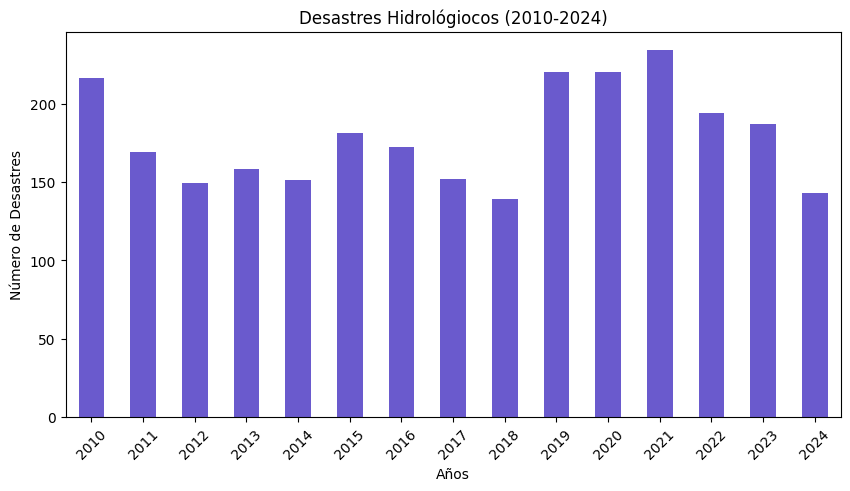

In [23]:
# Agrupar los desastres por año
desastres_por_año = df.groupby('Start Year')['Unnamed: 0'].count()

# Crear la gráfica
plt.figure(figsize=(10, 5))
desastres_por_año.plot(kind='bar', color="#6A5ACD")
plt.title('Desastres Hidrológiocos (2010-2024)')
plt.xlabel('Años')
plt.ylabel('Número de Desastres')
plt.xticks(rotation=45)
plt.show()

La siguiente Gráfica demuestra que el 2010, 2019, 2020 y 2021 Sobrepasan los 200 números de desastres mientras que los demás están por debajo, el año con mayor cantidad de d
Desastres Hidrológicos fue el 2021

3. Gráfica de Cantidad de Desastres Hidrológicos por País

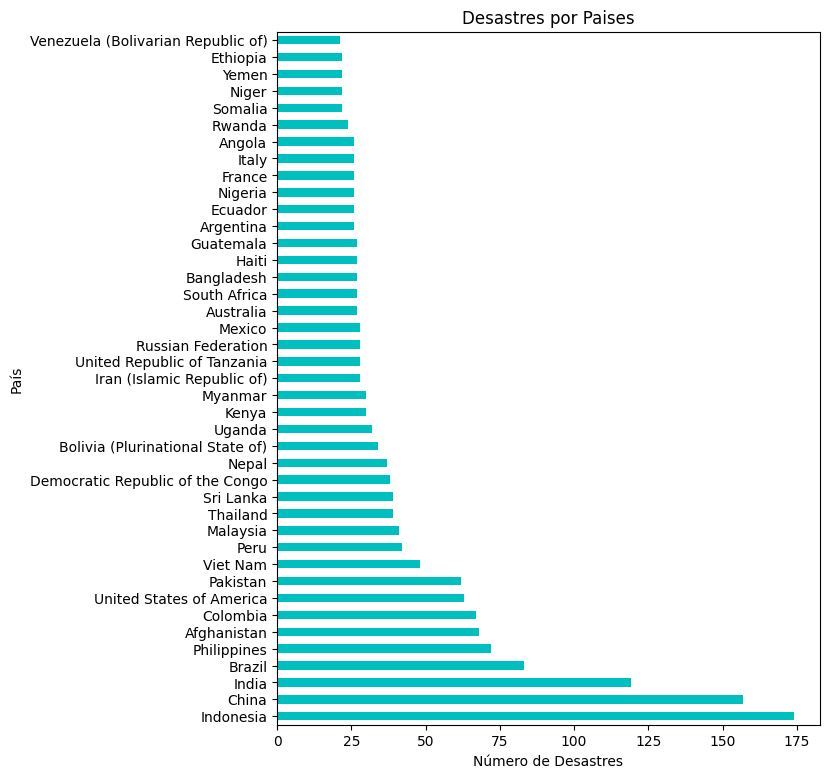

In [24]:
# Conteo de desastres por país
conteo_desastres = df['Country'].value_counts()

# Filtrar los países con más de 30 desastres
conteo_desastres_filtrado = conteo_desastres[conteo_desastres > 20]

plt.figure(figsize=(7, 9))

# Crear la gráfica de barras horizontales
conteo_desastres_filtrado.plot(kind='barh', color="#00BFBF")

plt.title("Desastres por Paises")
plt.xlabel("Número de Desastres")
plt.ylabel("País")
plt.show()

los 3 países con mayor cantidad de desastres hidrologicos fueron:

1. Indonesia
2. China
3. India

Pasaron de manera notoria los 75 número de desastres, esos tres países son pertenecientes a la región de Asia confirmandonos qué la misma es la más propensa a que sucedan este tipo de desastre natural.

* ¿Por qué suele suceder esto?

Esto se debe a que en la región de Asia el cambio climático da resultado al aumento de las temperaturas, relacionando  qué puedan suceder lluvias más intensas, olas de calor, fenómenos meteorológicos extremos y aumento del nivel del mar, lo cual da contribución al aumento de la frecuencia e intensidad de las inundaciones.